In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def f(x, coeff = [2, -3, 1]):
    return coeff[0]*x*x + coeff[1]*x + coeff[2]

In [7]:
x = []
for i in range(200):
    x.append(np.random.rand())

x.sort()

# Find corresponding values for f(x)
y = [0] * 200
for i in range(200):
    y[i] = f(x[i])

# Add error to the values
y_error = [0] * 200
for i in range(200):
    y_error[i] = y[i] + np.random.uniform(-0.02, 0.02)

# Find the coefficients to fit the errored values
b = np.array(y_error)
A = [[0 for _ in range(3)] for _ in range(200)]
for i in range(200):
    A[i][2] = 1
    A[i][1] = x[i]
    A[i][0] = x[i]*x[i]
A = np.array(A)

coeff = np.linalg.lstsq(A, b, rcond = None)[0]

print(coeff)

# find new y values using the coefficients found now
y_new = [0] * 200
for i in range(200):
    y_new[i] = f(x[i], coeff)

[ 1.98879292 -2.9881393   0.99765455]


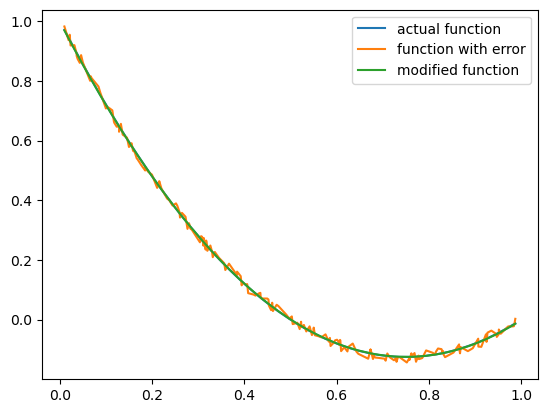

In [8]:
# make a plot
plt.plot(x, y, label = 'actual function')
plt.plot(x, y_error, label = 'function with error')
plt.plot(x, y_new, label = 'modified function')
plt.legend()
plt.show()